<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/Code_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install packages
!pip install pulp
import math


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 38.0 MB/s eta 0:00:00


In [ ]:
# Import Libraries
import numpy as np
from pulp import LpMaximize, LpMinimize, LpProblem, LpVariable, lpSum
import pandas as pd



In [ ]:
# Load data
wards = ["ward1", "ward2", "ward3", "ward4", "ward5", "ward6", "ward7", "ward8", "ward9", "ward10"]
max_beds_per_ward = {"ward1": 15, "ward2": 10, "ward3": 10, "ward4": 15, "ward5": 10, "ward6": 10, "ward7": 10, "ward8": 15, "ward9":10 , "ward10": 15}

In [11]:
import matplotlib.pyplot as plt

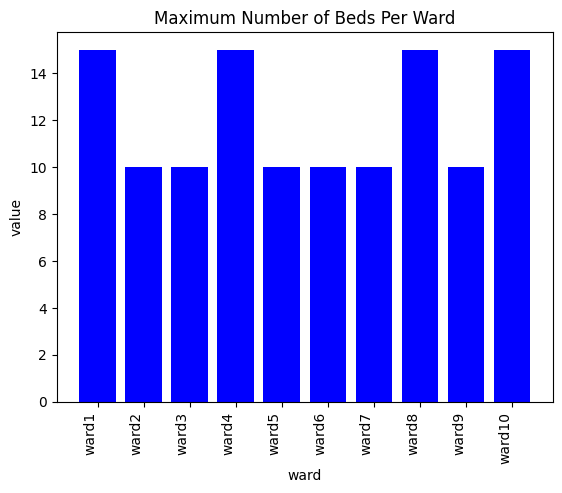

In [13]:
import matplotlib.pyplot as plt


# Convert dictionary keys and values to lists
ward = list(max_beds_per_ward.keys())
value = list(max_beds_per_ward .values())

# Create a bar chart
plt.bar(ward, value, color='blue')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('ward')
plt.ylabel('value')
plt.title('Maximum Number of Beds Per Ward')

# Show the plot
plt.show()




In [20]:


# Assigning priority
#def priority_levels(ward):
    # Define custom weights based on specific criteria
   # weights = {"ward1":1.0,"ward2":0.5,"ward3":0.2,"ward4":0.5,"ward5":0.2,"ward6":0.2,"ward7":0.2,"ward8":0.5,"ward9":0.2,"ward10":0.5}
   # return weights[ward]

priority_levels = {"ward1":1.0,"ward2":0.5,"ward3":0.2,"ward4":0.5,"ward5":0.2,"ward6":0.2,"ward7":0.2,"ward8":0.5,"ward9":0.2,"ward10":0.5}


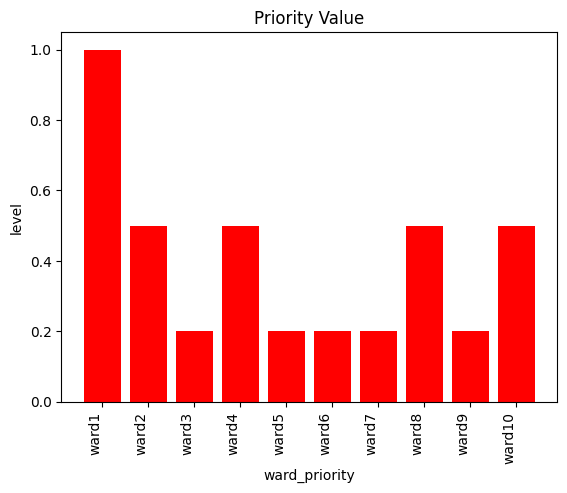

In [21]:
# Convert dictionary keys and values to lists
priority = list(priority_levels.keys())
level = list(priority_levels.values())

# Create a bar chart
plt.bar(priority, level, color='red')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('ward_priority')
plt.ylabel('level')
plt.title('Priority Value')

# Show the plot
plt.show()

In [24]:
# Simulate uncertain demand using a normal distribution
np.random.seed(42)  # Set seed for reproducibility
demand_mean = {"ward1": 10, "ward2": 5, "ward3": 5, "ward4": 10, "ward5": 5, "ward6": 5, "ward7": 4, "ward8": 10, "ward9": 5, "ward10": 10}
demand_std_dev = {"ward1": 3, "ward2": 2, "ward3": 1, "ward4": 3, "ward5":2 , "ward6": 1, "ward7": 2, "ward8": 2, "ward9": 2, "ward10": 3}
demand = {ward: max(0, int(math.ceil(np.random.normal(demand_mean[ward], demand_std_dev[ward])* priority_levels[ward]))) for ward in wards}

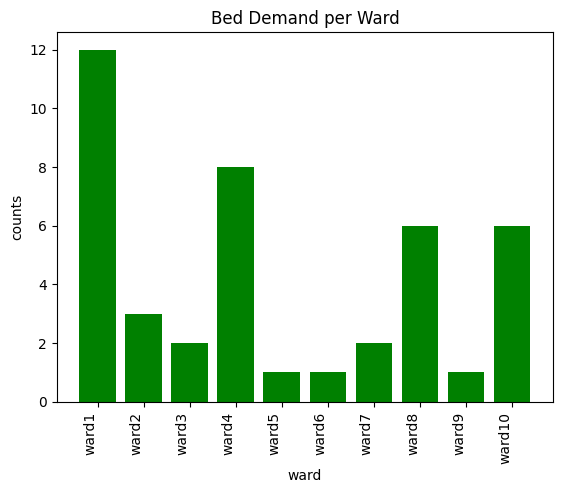

In [29]:
# Convert dictionary keys and values to lists
bed_demand = list(demand.keys())
count = list(demand.values())

# Create a bar chart
plt.bar(bed_demand, count, color='green')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('ward')
plt.ylabel('counts')
plt.title('Bed Demand per Ward');

In [28]:
# Real-time bed availability
real_time_availability = {"ward1":12,"ward2":8,"ward3":7 ,"ward4":15 ,"ward5":7 ,"ward6":5,"ward7":10, "ward8":12, "ward9":6, "ward10":12}


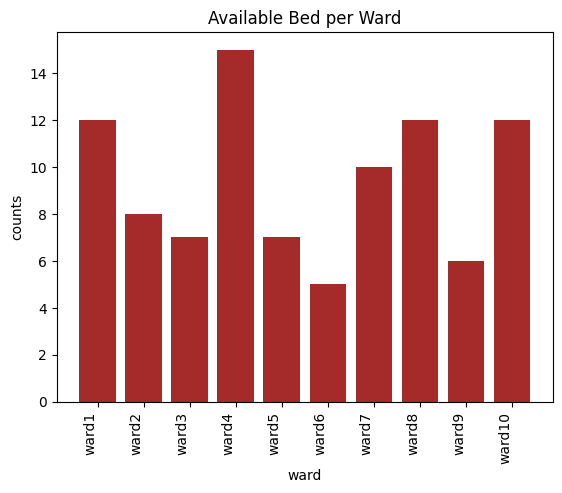

In [30]:
# Convert dictionary keys and values to lists
bed_available = list(real_time_availability.keys())
number = list(real_time_availability.values())

# Create a bar chart
plt.bar(bed_available, number, color='brown')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Add labels and title
plt.xlabel('ward')
plt.ylabel('counts')
plt.title('Available Bed per Ward');

In [31]:
# Create a linear programming problem
model_min = LpProblem(name="Healthcare_Bed_Minimum_Allocation", sense=LpMinimize)

In [32]:
# Decision Variables: Number of beds assigned to each ward
beds = {ward: LpVariable(name=f"{ward}_beds", lowBound=0, cat="Integer") for ward in wards}
beds

{'ward1': ward1_beds,
 'ward2': ward2_beds,
 'ward3': ward3_beds,
 'ward4': ward4_beds,
 'ward5': ward5_beds,
 'ward6': ward6_beds,
 'ward7': ward7_beds,
 'ward8': ward8_beds,
 'ward9': ward9_beds,
 'ward10': ward10_beds}

In [34]:
# Objective Function: Minimize the total weighted number of beds
model_min += lpSum(priority_levels[ward] * beds[ward] for ward in wards), "Total_Weighted_Beds"

In [35]:
# Constraints: Demand must be met for each ward, and the number of beds cannot exceed the maximum for each ward
for ward in wards:
    model_min += beds[ward] >= demand[ward], f"Ward_Demand_{ward}"
    model_min += beds[ward] <= max_beds_per_ward[ward], f"Max_Bed_{ward}"
    model_min += beds[ward] <= real_time_availability[ward], f"Real_Time_Availability_{ward}"


In [36]:
# Solve the linear programming problem
model_min.solve()

1

In [37]:
# Display the results
if model_min.status == 1:  # Optimal solution found
    for ward in wards:
        print(f"Minimum number of beds for {ward}: {beds[ward].varValue}")
else:
    print("No optimal solution found.")


Minimum number of beds for ward1: 12.0
Minimum number of beds for ward2: 3.0
Minimum number of beds for ward3: 2.0
Minimum number of beds for ward4: 8.0
Minimum number of beds for ward5: 1.0
Minimum number of beds for ward6: 1.0
Minimum number of beds for ward7: 2.0
Minimum number of beds for ward8: 6.0
Minimum number of beds for ward9: 1.0
Minimum number of beds for ward10: 6.0


In [42]:
beds[ward].varValue

6.0

In [ ]:
# Create a linear programming problem for maximization
model_max = LpProblem(name="Healthcare_Bed_Maximum_Allocation", sense=LpMaximize)

In [ ]:
# Objective Function: Maximize the total weighted number of beds
model_max += lpSum(priority_levels(ward) * beds[ward] for ward in wards), "Total_Weighted_Beds"

In [ ]:
# Constraints: Demand must be met for each ward, and the number of beds cannot exceed the maximum for each ward
for ward in wards:
    model_max += beds[ward] >= demand[ward], f"Ward_Demand_{ward}"
    model_max += beds[ward] <= max_beds_per_ward[ward], f"Max_Bed_{ward}"
    model_max += beds[ward] <= real_time_availability[ward], f"Real_Time_Availability_{ward}"

In [ ]:
# Solve the linear programming problem
model_max.solve()

1

In [ ]:
# Display the results
if model_max.status == 1:  # Optimal solution found
    for ward in wards:
        print(f"Maximum number of beds for {ward}: {beds[ward].varValue}")
else:
    print("No optimal solution found.")


Maximum number of beds for ward1: 12.0
Maximum number of beds for ward2: 8.0
Maximum number of beds for ward3: 7.0
Maximum number of beds for ward4: 15.0
Maximum number of beds for ward5: 7.0
Maximum number of beds for ward6: 5.0
Maximum number of beds for ward7: 10.0
Maximum number of beds for ward8: 12.0
Maximum number of beds for ward9: 6.0
Maximum number of beds for ward10: 12.0
